In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('../data/content.csv')

# Tasks - Part 1

Here are some questions that we'd like you to answer about the dataset:

1. How many companies are in the dataset?
2. How many unique URLs are in the dataset?
3. What is the most common chunk type?
4. What is the distribution of chunk types by company?

## 1. How many companies are in the dataset?

In [4]:
len(np.unique(df['company_id']))

75

In [5]:
len(np.unique(df['company_id'])) == len(np.unique(df['company_name']))

True

The dataset contains 75 unique companies. The columns `company_name` and `company_id` have a one-to-one correspondence, ensuring that there are no duplicate names in the `company_name` column, assuming company_id is unique.

## 2. How many unique URLs are in the dataset?

In [6]:
len(np.unique(df['url']))

530

There are 530 unique urls in this dataset. Let's fetch the prefix urls for these companies and check if it matches with the unique company_id

In [7]:
prefix_url = [x.split('/')[0] + '//' + x.split('/')[2] for x in df['url']]

In [8]:
df['prefix_url'] = prefix_url

In [9]:
len(np.unique(prefix_url))

77

2 company names seems to be repeated

In [10]:
company_id = []
uniq_url = []
for x in range(len(df['prefix_url'])):
    if df.iloc[x]['prefix_url'] not in uniq_url:
        uniq_url.append(df.iloc[x]['prefix_url'])
        company_id.append(df.iloc[x]['company_id'])

In [11]:
len(company_id) == len(uniq_url)

True

In [12]:
temp_df = pd.DataFrame({'company_id_unique': company_id, 'unique_url': uniq_url})

In [13]:
duplicate_df = temp_df[temp_df.duplicated(subset=['company_id_unique'])]

In [14]:
temp_df[temp_df['company_id_unique'].isin(duplicate_df['company_id_unique'])]

,company_id_unique,unique_url
4,a45e4bd7-0ea7-4c3f-ba6a-cdc5027f6c60,https://www.bingotech.net
54,a0dffac7-5b73-47bb-8a31-78440a1aef33,https://4wheeltravels.com
56,a45e4bd7-0ea7-4c3f-ba6a-cdc5027f6c60,https://bingotech.net
57,a0dffac7-5b73-47bb-8a31-78440a1aef33,https://sg2plcpnl0188.prod.sin2.secureserver.n...


Bingotech duplicate domain names: https://www.bingotech.net and https://bingotech.net <br>
4wheeltravels duplicate domain names: https://4wheeltravels.com and https://sg2plcpnl0188.prod.sin2.secureserver.n...

## 3. What is the most common chunk type?

In [15]:
df['chunk_type'].value_counts()

chunk_type
header    549
main      545
head      530
footer    504
Name: count, dtype: int64

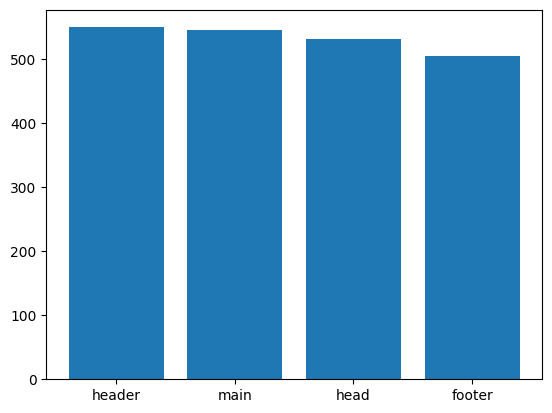

In [16]:
counts = df['chunk_type'].value_counts()
plt.bar(counts.index, counts.values) 
plt.show()

**Header** is the most common chunk type.

## 4. What is the distribution of chunk types by company?

In [17]:
chunk_type_distribution = df.groupby('company_id')['chunk_type'].value_counts()

In [18]:
pd.DataFrame(chunk_type_distribution)

count
company_id                           chunk_type       
041e9ac4-d7eb-499f-8cfb-fa95dca20cd5 footer         11
                                     head           11
                                     header         11
                                     main           11
057293c5-03c8-427d-9c78-d7cfee35e525 footer          9
...                                                ...
f7958fe2-7f18-4da1-be80-1b6ebd68e427 main            1
f9d892e2-ded2-4ac3-bf2d-bc65c5c58131 footer         11
                                     head           11
                                     header         11
                                     main           11

[268 rows x 1 columns]

In [19]:
def create_company_dict(group):
    chunk_type_counts = group['chunk_type'].value_counts().to_dict()
    return {chunk_type: count for chunk_type, count in chunk_type_counts.items()}

chunk_type_distribution_dict = {company_id: create_company_dict(group) for company_id, group in df.groupby('company_id')}

In [20]:
chunk_type_distribution_dict

{'041e9ac4-d7eb-499f-8cfb-fa95dca20cd5': {'head': 11,
  'header': 11,
  'footer': 11,
  'main': 11},
 '057293c5-03c8-427d-9c78-d7cfee35e525': {'head': 9,
  'header': 9,
  'footer': 9,
  'main': 9},
 '0a2dd621-fc29-4d92-92af-a9f27d36b88a': {'main': 12,
  'header': 11,
  'footer': 11,
  'head': 11},
 '1a944f93-a2ac-4352-9b65-a39c7addcb36': {'head': 11,
  'header': 11,
  'footer': 11,
  'main': 11},
 '1b7e4fac-5467-4773-a330-e9ef080aa00a': {'main': 12,
  'head': 11,
  'footer': 11,
  'header': 5},
 '1b9af211-c118-45dc-a7a9-c36acd5c3606': {'head': 10,
  'header': 10,
  'footer': 10,
  'main': 10},
 '1c454ddb-4be8-4c6a-922e-45c877efa542': {'main': 17,
  'head': 11,
  'header': 11,
  'footer': 11},
 '1ccb0060-ed06-40d9-affd-b94b7e5041a1': {'head': 1, 'main': 1},
 '1d793954-ad6e-4d64-84d6-965b6d7e6e28': {'header': 22,
  'head': 11,
  'footer': 11,
  'main': 11},
 '1fd25493-2b64-4e45-9286-496d1a2899c1': {'header': 23,
  'main': 11,
  'footer': 10,
  'head': 10},
 '21a77c0a-0dae-4d9d-8f16-722c4

## General Analysis

### Analyzing chunk_id


In [21]:
len(np.unique(df['chunk_id']))

2128

All the elements in the `chunk_id` are unique. This can be used as the primary key for indexing/lookup.

### Analyzing chunk_hash


In [22]:
len(np.unique(df['chunk_hash']))

1337

In [23]:
df[df['chunk_hash'].duplicated()]

,company_id,company_name,url,chunk_type,chunk_hash,chunk,chunk_id,prefix_url
60,aab2261b-7065-460d-83de-99404fb50f65,betahaus Sofia,https://betahaus.bg/blog,footer,2f75ead3d8821183e12c322c1800afe60a175572ca3b3a...,"<footer class=""footer""><h4>Връзка с нас</h4>ул...",af3a36a1-fb5a-44b1-b5ae-9b040ca5889c,https://betahaus.bg
63,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/blog/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",293eeafb-09f9-4611-8d37-0e5f07dae564,https://bestbees.com
64,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/blog/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",fe49b6bb-9a6d-4c3a-8b23-40c8071e3cd4,https://bestbees.com
87,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/get-started/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",a6851616-8a65-4409-9a63-66a6eb2153cc,https://bestbees.com
88,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/get-started/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",271d5729-d600-47f6-87e2-5b7aa065f712,https://bestbees.com
...,...,...,...,...,...,...,...,...
2111,1fd25493-2b64-4e45-9286-496d1a2899c1,American Express Travel,https://www.americanexpress.com/en-us/support/...,header,994f9b66932ae87ff338704924562cf913f73c0f49ae26...,"<ul><li><a href=""https://www.americanexpress.c...",ace4dac1-4401-4b5b-b61a-4b922d3a8362,https://www.americanexpress.com
2112,1fd25493-2b64-4e45-9286-496d1a2899c1,American Express Travel,https://www.americanexpress.com/en-us/support/...,footer,7d4855c2c301923efef11a825dca16e1c6791d6cec96dc...,"<footer class=""axp-footer__footer__footer___32...",4ea2b388-7505-4e20-b57e-75eaddb4d242,https://www.americanexpress.com
2120,0a2dd621-fc29-4d92-92af-a9f27d36b88a,Mobile Programming LLC.,https://www.mobileprogramming.com/,head,023ecc39b08c78b255f966b4e7768ab00f491469e096f0...,<head><title>App Design &amp; Development | Mo...,07c06cb2-1d10-46ac-84e3-b0eaa0279fb2,https://www.mobileprogramming.com
2121,0a2dd621-fc29-4d92-92af-a9f27d36b88a,Mobile Programming LLC.,https://www.mobileprogramming.com/,header,4e4d70173788abe5d7e7004f590d78dd9911e775c91aa4...,"<header class=""top-header"" id=""myHeader""><nav>...",b9015037-7ef1-4bb1-8607-f63fefb06226,https://www.mobileprogramming.com


In [24]:
temp_df = df[df['company_id'] == '21a77c0a-0dae-4d9d-8f16-722c4cb80fa4']
temp_df[temp_df['chunk_type'] == 'header']

,company_id,company_name,url,chunk_type,chunk_hash,chunk,chunk_id,prefix_url
9,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/privacy-policy/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",4947730c-1fce-4572-b8b9-a030f2f6d1f9,https://bestbees.com
63,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/blog/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",293eeafb-09f9-4611-8d37-0e5f07dae564,https://bestbees.com
87,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/get-started/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",a6851616-8a65-4409-9a63-66a6eb2153cc,https://bestbees.com
810,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/faq/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",30cf696d-66d5-4d47-b05c-4e79ca90bfd4,https://bestbees.com
826,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/about/keynotes/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",e1467392-216e-4479-b64e-815b4eb4700c,https://bestbees.com
930,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/about/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",d596ea9f-41f5-4a3a-98ab-7e169f256941,https://bestbees.com
996,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/category/press/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",3816ccf8-717c-4cf0-9466-e7f05591b4bf,https://bestbees.com
1233,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",30a94c64-02b8-4132-82e4-59153c58f493,https://bestbees.com
1732,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/jobs/,header,2a1407969dc3931af069563f58b3ec89bfa300ac6c4b1f...,"<header class=""fl-builder-content fl-builder-c...",72c84268-0676-4ad4-bb09-0325badf2541,https://bestbees.com


In [25]:
temp_df = df[df['company_id'] == '21a77c0a-0dae-4d9d-8f16-722c4cb80fa4']
temp_df[temp_df['chunk_type'] == 'footer']

,company_id,company_name,url,chunk_type,chunk_hash,chunk,chunk_id,prefix_url
10,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/privacy-policy/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",35f967ac-2194-41d4-ac84-7063eb9036d4,https://bestbees.com
64,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/blog/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",fe49b6bb-9a6d-4c3a-8b23-40c8071e3cd4,https://bestbees.com
88,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/get-started/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",271d5729-d600-47f6-87e2-5b7aa065f712,https://bestbees.com
811,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/faq/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",32088a7c-7502-455d-b129-b0744fbcedba,https://bestbees.com
827,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/about/keynotes/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",84c66554-a2ab-4a3a-a593-05e0ea5725b5,https://bestbees.com
931,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/about/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",a4eaf0b4-e612-499b-ac38-aafd2a9d1fec,https://bestbees.com
997,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/category/press/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",930d5c61-03d0-47a5-b662-88b015269848,https://bestbees.com
1234,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",3e4d2278-a93a-404d-9610-96e1852fba49,https://bestbees.com
1733,21a77c0a-0dae-4d9d-8f16-722c4cb80fa4,The Best Bees Company,https://bestbees.com/jobs/,footer,c04c6008e00dc3e53fdea0d3f8db942f8aff0bff155c17...,"<footer class=""fl-builder-content fl-builder-c...",78a874b6-051c-479b-9410-7d3c48b27b21,https://bestbees.com


On analyzing the data, duplicates occur when the prefix url is same eg:https://bestbees.com but the actual url is different.
- https://bestbees.com/blog/ and https://bestbees.com/get-started/	both refer to the same company (bestbees) and might have the same header or footer.

This makes sense as most of the companys header and footer remains common across their entire site.

# Part 2- RAG 

The `chunk` column has the actual information related to the companies. Since these are in HTML format, it should be converted to normal text which isn't confusing to the LLM.

**General HTML structure**

1. Head
2. Header
3. Main
4. Footer

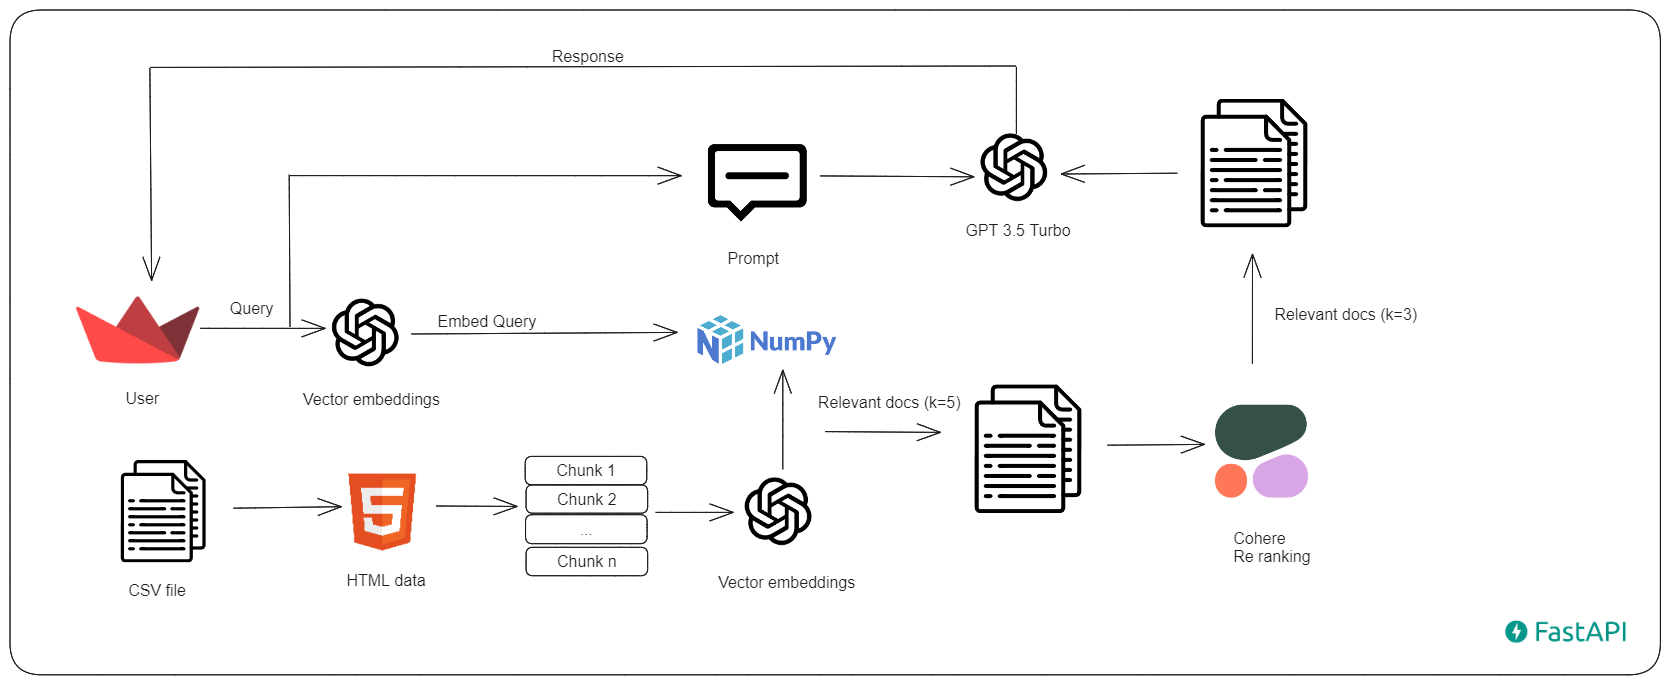

In [29]:
from IPython.display import Image
Image(filename='../assets/Architecture_diagram.png')

## Data Pre-Processing

In [30]:
from bs4 import BeautifulSoup

In [31]:
def extract_text(html_content):
    """
    Extracts text from HTML content.
    
    Args:
        html_content (str): The HTML content to extract text from.
        
    Returns:
        str: The extracted text.
    """
    soup = BeautifulSoup(html_content, "lxml")
    text = soup.get_text(separator="\n", strip=True)
    return text

In [32]:
extracted_text = [extract_text(x) for x in df['chunk']]
df['extracted_text'] = extracted_text

In [33]:
df['length'] = [len(x) for x in df['extracted_text']]

On further extraction some of the chunks have length <=3. Let's remove them from the dataset.

In [34]:
df = df[df['length'] >3]
df.reset_index(inplace = True)

In [35]:
df.shape

(2049, 11)

Adding company name to the main chunk type might help with the retrieval.

In [36]:
df.loc[df['chunk_type'] == 'main', 'extracted_text'] = "Company name: " + df['company_name'] + " " + df['extracted_text']

In [37]:
df.drop('index', axis= 1, inplace = True)

## Chunking

Chunking is needed when
1. The input to the LLM model exceeds the token limit.
2. Representing huge texts as a single vector representation might be noisy and might loose some important information in the process.
3. Longer chunks/texts leads to an increased inference cost.

The given dataset has been already chunked using the Hierarchical chunking approach.

**Usage:** <br>
- OPEN AI GPT 3.5 turbo model `gpt-3.5-turbo` (max token limit = 16835)
-`text-embedding-3-small`. (max token limit = 8191)

In this dataset
- max_chunk_length = 5834 words, tokens = 7700 *approx* <br>
- avg_chunk_length = 254 words, tokens = 338 *approx*

We could leave the chunks as it is but there are risks of the 3 points mentioned above and most of the top performing open source embedding models have max token limit of 512. So we follow the below strategy for chunking

Assuming we will be retrieving `top_k` documents where k <= 5 and total token limit by these k documents <=10000 and rest of the tokens for query and the prompt (6835), each document could be of size 2000 tokens ~  *1500 words approx*. So max chunk can be of size 1500 words and if it exceeds this limit, further chunking would be done recursively.

In [39]:
df['length'] = [len(x.split()) for x in df['extracted_text']]

In [40]:
np.max(df['length'])

5834

In [41]:
np.mean(df['length'])

254.8818936066374

{'whiskers': [<matplotlib.lines.Line2D at 0x29e2dc8e4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x29e2dc8e9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e2dc8e200>],
 'medians': [<matplotlib.lines.Line2D at 0x29e2dc8ef20>],
 'fliers': [<matplotlib.lines.Line2D at 0x29e2dc8f1c0>],
 'means': []}

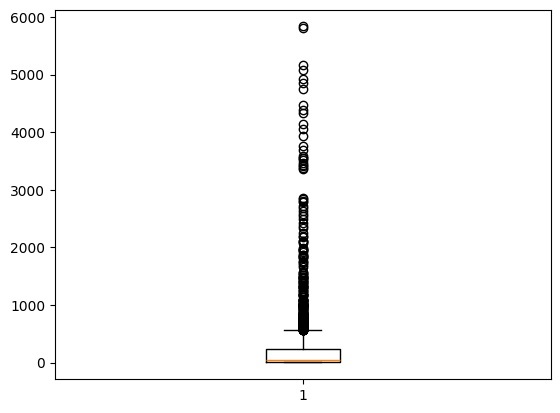

In [43]:
plt.boxplot(df['length'])

In [44]:
df[df['length']>1500]

,company_id,company_name,url,chunk_type,chunk_hash,chunk,chunk_id,prefix_url,extracted_text,length
29,c84b92cc-28a5-4383-845d-237926a5f120,Absolute Reg,https://absolutereg.co.uk/buying-terms-conditions,main,21b56cb5c32b5122087a47074fd1996ec84f60749c4cc9...,"<body><nav><a href=""https://absolutereg.co.uk/...",2a40a01a-04b5-4df5-9bbe-cbd8e7a429e0,https://absolutereg.co.uk,Company name: Absolute Reg Menu\nBuy\nNumber P...,2205
40,aab2261b-7065-460d-83de-99404fb50f65,betahaus Sofia,https://betahaus.bg/privacy-policy,main,1e94615612f1e4a8014da72a2d4ac96d80a972cdaaac46...,"<body class=""privacy-policy page-template-defa...",66b43a7a-bf81-45d3-b546-541acf38a369,https://betahaus.bg,Company name: betahaus Sofia Локации\nЦени\nОб...,1832
77,1d793954-ad6e-4d64-84d6-965b6d7e6e28,Abelini,https://www.abelini.com/terms-of-use,main,559180828d3239e8f2754891e04e927a6ed0ffe63c6ad9...,"<body class=""body"">Loading...<input placeholde...",f992f224-d0ad-42ce-8487-b2385829b799,https://www.abelini.com,Company name: Abelini Loading...\nHome\nTerms ...,4471
97,edda975d-a01c-4e93-8245-68183fb19ced,Billecta,https://billecta.com/for-storforetag/,footer,55daf8110e024ce11061d5ef2a342ceb15390eae36d054...,"<body class=""page-template page-template-100-w...",57d5ce17-d142-4093-abe1-c50a90817c16,https://billecta.com,Skip to content\nFör storföretag 2023-08-31T12...,1513
127,d09d7050-14d4-4bee-b7bc-709a046fa5c0,Ambrose Alli University,https://aauekpoma.edu.ng/about/industrial-trai...,main,727e5f668134587a5e229fdc26174b77168634bccb8d18...,"<body class=""page-template page-template-page-...",a3cf21f3-558e-48a9-8915-cffca39092cc,https://aauekpoma.edu.ng,Company name: Ambrose Alli University Home (cu...,1981
...,...,...,...,...,...,...,...,...,...,...
1952,1fd25493-2b64-4e45-9286-496d1a2899c1,American Express Travel,https://www.americanexpress.com/en-us/travel/,main,ee48d9aab959807043e15838ca656504bfc931c225f84e...,<h2>*Terms and Conditions</h2><h3>2X Membershi...,569608c0-8bf7-499b-9a12-b0fc8ce0540e,https://www.americanexpress.com,Company name: American Express Travel *Terms a...,4745
1958,1fd25493-2b64-4e45-9286-496d1a2899c1,American Express Travel,https://www.americanexpress.com/us/credit-card...,main,3b4c79dd6bbb79e149c66a75d5d7fbbdd088da6ea5a79c...,"<body class=""en_US gcp-us-corpCategory prospec...",b7f2e80f-50db-4599-8ed9-39ac8b41cb00,https://www.americanexpress.com,Company name: American Express Travel {{prospe...,1551
1973,1fd25493-2b64-4e45-9286-496d1a2899c1,American Express Travel,https://www.americanexpress.com/us/credit-card...,main,473047d6bcded968180242c12a69768022815efac5f8b3...,"<body class=""en_US gcp-us-businessCardsV2 pros...",ac388d3b-5200-4c6f-a59c-60a2e394fb01,https://www.americanexpress.com,Company name: American Express Travel {{prospe...,2538
1977,a07fb185-9f97-498c-bcda-a4c21fe27467,Università degli Studi di Milano,https://di.unimi.it/it/privacy-e-cookie,main,b154b1791389d5f2a3533d9241023220d5bf759ccf018d...,"<body class=""path-node page-node-type-pagina-g...",a241fd56-6363-4ede-8580-a4a45b4b19b8,https://di.unimi.it,Company name: Università degli Studi di Milano...,2369


In [45]:
def split_text_recursively(text, max_length=1500, overlap_ratio=0.3):
    """
    Splits a given text into chunks recursively based on the maximum length and overlap ratio.

    Args:
        text (str): The input text to be split.
        max_length (int, optional): The maximum length of each chunk. Defaults to 1500 words.
        overlap_ratio (float, optional): The overlap ratio between consecutive chunks. Defaults to 0.3.

    Returns:
        list: A list of text chunks where the no of words in a sentence is <1500.

    """
    words = text.split()
    if len(words) <= max_length:
        return [' '.join(words)]
    else:
        overlap_length = int(max_length * overlap_ratio)
        split_position = max_length
        first_chunk = ' '.join(words[:split_position])
        remaining_words = words[split_position - overlap_length:]
        remaining_chunks = split_text_recursively(' '.join(remaining_words), max_length, overlap_ratio)
        return [first_chunk] + remaining_chunks

df['split_texts'] = df['extracted_text'].apply(lambda x: split_text_recursively(x, 1500, 0.3))
df = df.explode('split_texts')
df = df.reset_index(drop=True)

In [46]:
length = [len(x.split()) for x in df['split_texts']]

In [47]:
pd.Series(np.array(length)>1500).value_counts()

False    2171
Name: count, dtype: int64

### Generating new unique chunk_id after chunking

In [48]:
import uuid
new_chunk_id = [str(uuid.uuid4()) for _ in range(len(df))]
df['new_chunk_id'] = new_chunk_id

### Areas for Improvement

Some of the different techniques to enhance the chunking performance/accuracy:
1. Summarizing the document (company wise - all chunks related to that company) and appending the summary to the chunks. If the summary is too long, sub summaries could be made and these sub summaries could be appended to the relevant chunks.
2. ParentDocumentRetriever by Langchain wherein the children chunks are used for retrival and during the LLM output generation the parent documents are fed to the model.
3. Contextual Chunking: The text could be splitted based on the HTML tags instead of splitting after 1500 words.
4. Head could be added to the rest of chunk_types as this might help with the retrieval process.

## Embeddings

Since these chunks are not huge and these are all text documents, a simple numpy vector should be able to hold these embeddings. Vector databases like FAISS, Pinecone or Chroma would be an overkill for this task.

In [45]:
from openai import OpenAI
client = OpenAI(api_key='') # place openai api key here

In [46]:
def create_embeddings(text):
    """
    Creates embeddings for the given text using a text-embedding-3-small model.
    
    Args:
        text (str): The input text for which embeddings need to be created.
        
    Returns:
        numpy.ndarray: The embedding vector for the input text.
    """
    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

In [47]:
embeddings = [create_embeddings(x) for x in df['split_texts']]

In [48]:
split_embeddings = np.array(embeddings)  
np.save('../embeddings/split_embeddings.npy', split_embeddings)

### Areas for Improvement
We could also try other open source embeddings like 
- gte
- bge
- e5

To accomodate the token limit of these models we could just change the parameter `max_length` in `split_text_recursively` function and rerun the code again. 

## Relevant docs retrieval

Cosine similarity is the most common metric that works well to find relevant text embeddings. We could try other distance metrics like euclidean, jaccard or even dot product. In general other metrics don't work as well as cosine similarity.

In [49]:
# Load the vector embeddings
split_embeddings = np.load('../embeddings/split_embeddings.npy')

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import cohere

In [51]:
def find_relevant_vectors_cosine(query, document_embeddings, top_k=5):
    """
    Finds the top k relevant vectors based on cosine similarity between a query vector and a list of document embeddings.

    Args:
        query (array-like): The query vector.
        document_embeddings (array-like): The list of document embeddings.
        top_k (int, optional): The number of top relevant vectors to return. Defaults to 5.

    Returns:
        tuple(list, list): A list of indices representing the top k most relevant vectors
        in the collection and their corresponding cosine similarity scores
    """
    query_embedding = np.array(create_embeddings(query)).reshape(1,-1)
    similarities = cosine_similarity(query_embedding, document_embeddings)
    sorted_indices = np.argsort(similarities[0])[::-1]
    top_scores = np.sort(similarities.flatten())[::-1][:top_k]
    return sorted_indices[:top_k], top_scores

In [52]:
def find_relevant_vectors_tfidf(query, documents, top_k=5):
    """
    Finds the most relevant vectors in a collection of documents based on TF-IDF similarity.

    Args:
        query (str): The query string to compare against the documents.
        documents (list): A list of strings representing the documents.
        top_k (int): The number of top relevant vectors to return. Default is 5.

    Returns:
        list: A list of indices representing the top k most relevant vectors in the collection.
    """
    vectorizer = TfidfVectorizer()
    tfidf_documents = vectorizer.fit_transform(documents)
    tfidf_query = vectorizer.transform([query])
    similarities = cosine_similarity(tfidf_query, tfidf_documents)
    sorted_indices = np.argsort(similarities[0])[::-1]
    return sorted_indices[:top_k]

In [53]:
def rerank_documents(query, extracted_docs_lst):
    """
    Reranks a list of extracted documents based on a given query using the Cohere API.

    Args:
        query (str): The query to be used for reranking the documents.
        extracted_docs_lst (list): A list of extracted documents to be reranked.

    Returns:
        list : A list of reranked documents indices based on the query.

    """
    co = cohere.Client(api_key = '') # place cohere api key here
    results = co.rerank(query = query, documents =extracted_docs_lst , top_n = 3)
    reranked_indices = [result.index for result in results.results]
    return reranked_indices

In [54]:
def extract_documents(query, indices, df, similarity):
    """
    Extracts documents from a DataFrame based on given indices and reranks them using a query.
    
    Args:
        query (str): The query used for reranking the documents.
        indices (list): A list of indices indicating the documents to be extracted from the DataFrame.
        df (pandas.DataFrame): The DataFrame containing the documents.
        similarity (list): Cosine similarity of relevant documents
        
    Returns:
        tuple(str, list, list): A tuple containing the extracted documents,the URLs of the extracted documents
        and the cosine similarity score.
    """
    extracted_docs_lst = [df.iloc[i]['split_texts'] for i in indices]
    extracted_docs_url = np.array([[df.iloc[i]['url'] for i in indices]]).flatten()
    reranked_docs_idx = rerank_documents(query, extracted_docs_lst)
    cosine_score = [similarity[x] for x in reranked_docs_idx]
    reranked_docs = [extracted_docs_lst[x] for x in reranked_docs_idx]
    reranked_urls = [extracted_docs_url[x] for x in reranked_docs_idx]
    extracted_docs = " ".join(reranked_docs)
    return extracted_docs, reranked_urls, cosine_score

In [55]:
embeddings_reshaped = np.vstack(split_embeddings)

In [56]:
query = 'What does the company Caravan Health do?'

In [57]:
indices_ss, similarity = find_relevant_vectors_cosine(query, embeddings_reshaped)
indices_kw = find_relevant_vectors_tfidf(query, df['split_texts'])

In [58]:
extracted_docs, extracted_docs_url, cosine_score = extract_documents(query, indices_ss, df, similarity)

### Areas for Improvement
To enhance retrieval performance, we could consider employing the following techniques:

1. Hybrid Search: Combine semantic search with keyword search for improved results. In our case the keyword-based retrieval falls short,  and additional data cleaning may be necessary. Experimenting with different vectorizer parameters can also boost performance.
2. If prior knowledge about the company is available, restrict the retrieval scope accordingly. For instance, if searching for information solely about company X within a pool of other companies, incorporate the company name or ID as metadata for each piece of content. This limits the search scope to relevant information about company X, enhancing retrieval precision.
3. Use a Supervised classifier as a filter.
4. Reranking (mono BERT, MonoT5, duo BERT)
5. SentenceWindow Retrieval

## Answer Generation

In [59]:
def generate_response(query, extracted_docs):
    """
    Generates a response using the OpenAI GPT-3.5 Turbo model.

    Args:
        query (str): The user's query.
        extracted_docs (str): The extracted documents related to the query.

    Returns:
        str: The generated response from the GPT-3.5 Turbo model.
    """
    llm_content = query + '\n\n' + extracted_docs
    response = client.chat.completions.create(
      model="gpt-3.5-turbo-0125",
        temperature=0.8,
      messages=[
        {"role": "system", "content": "You are an helpful assistant. You are helping a user with a question. \
        If you dont know the answer just say I dont know instead of making stuff up and use only\
        the given data to answer the query. If the user asks generic question \
          which is not related to the content, politely ask them to stay within the context"},
        {"role": "user", "content": llm_content}
      ]
    )
    return (response.choices[0].message.content)

In [60]:
llm_answer = generate_response(query, extracted_docs)
print(llm_answer)
print("Source Documents: \n", extracted_docs)
print("Source URL: \n", extracted_docs_url)
print("Cosine Similarity scores: \n", cosine_score)

The company Caravan Health is now known as Signify Health. Signify Health focuses on providing advanced analytics and clinical network services to drive better health outcomes and experiences for health plan members and partners nationwide. They specialize in connecting a fragmented healthcare system, engaging individuals in in-home and virtual care settings, improving outcomes with data-driven insights, and expanding access to value-based care programs.
Source Documents: 
 Company name: Caravan Health Close navigation Individuals & Families Preparing For Your Visit What is an In-home Health Evaluation? Schedule a visit Solutions In-home Health Evaluations Diagnostic and Preventive Services CVS Accountable Care Product Innovation Who We Serve: Health Plans Hospitals and Health Systems Individuals and Families Partners About Us Our Story Culture Leadership Team Investor Relations Insights Blog Events News Resources Careers Signify Health Careers Life at Signify Join our Team Search Jobs

## General Areas for Improvements
- Some of the texts are in other language. They could be translated to english. If translation is not possible we could use multi language embeddings.
- Cosine similarity scores can be normalized using min max scaling i.e highest value in the list is assigned a value of 1 and the rest of the values are scaled accordingly.
- Use robust metrics for RAG evaluation (RAGAS: Faithfulness, Answer relvance, Context Precision, Context Recall and Context Relevance)

## References

1. https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them